# Diabetes Perdiction
### Description : this program detects if someone is having diabetes or not using machine learning and python

### The program detects someone has daibetes or not using machine Learning and python! 

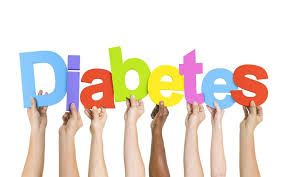

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/s-gd/Diabetes Detection/diabetes.csv')
heading=list(df.columns)
print(heading)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
Dimensions=df.shape
print('Dimension of the data : ',Dimensions)

Dimension of the data :  (769, 9)


In [7]:
print(df.groupby('Outcome').size())

Outcome
0    501
1    268
dtype: int64


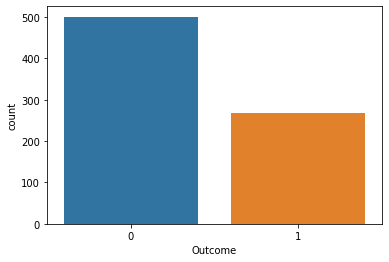

In [13]:
import seaborn as sns
sns.countplot(df['Outcome'],label='Count')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


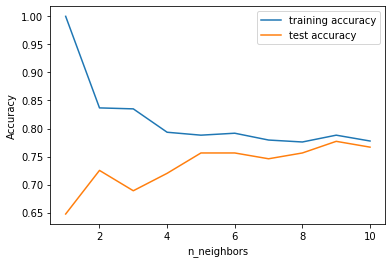

In [22]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,Y_tr,Y_ts = train_test_split(df.loc[:,df.columns!='Outcome'],df['Outcome'],stratify=df['Outcome'],random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]

#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_tr,Y_tr)
    #record training set accuracy
    training_accuracy.append(knn.score(X_tr,Y_tr))
    #record test set accuracy
    test_accuracy.append(knn.score(X_ts,Y_ts))
    
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [23]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_tr,Y_tr)
print('Accuracy of K-NN classifier on training set : {:.2f}'.format(knn.score(X_tr,Y_tr)))
print('Accuracy of K-NN classifier on test set     : {:.2f}'.format(knn.score(X_ts,Y_ts)))

Accuracy of K-NN classifier on training set : 0.79
Accuracy of K-NN classifier on test set     : 0.78


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_tr,Y_tr)
print('Accuracy on training set : {:.3f}'.format(tree.score(X_tr,Y_tr)))
print('Accuracy on test set     : {:.3f}'.format(tree.score(X_ts,Y_ts)))

Accuracy on training set : 1.000
Accuracy on test set     : 0.699


In [25]:
tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_tr,Y_tr)
print('Accuracy on training set : {:.3f}'.format(tree.score(X_tr,Y_tr)))
print('Accuracy on test set     : {:.3f}'.format(tree.score(X_ts,Y_ts)))

Accuracy on training set : 0.759
Accuracy on test set     : 0.736


In [26]:
print('Feature importances :\n{}'.format(tree.feature_importances_))

Feature importances :
[0.         0.70903037 0.         0.         0.02363197 0.24511535
 0.         0.02222231]


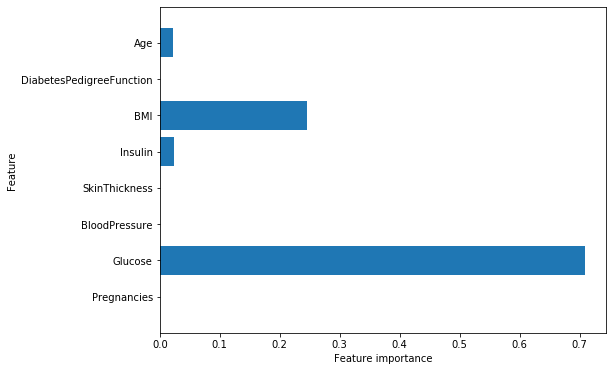

In [31]:
def plot_feature_importances_df(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),heading)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
plot_feature_importances_df(tree)
    

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_tr,Y_tr)
print('Accuracy on training set : {:.2f}'.format(mlp.score(X_tr,Y_tr)))
print('Accuracy on test set     : {:.2f}'.format(mlp.score(X_ts,Y_ts)))

Accuracy on training set : 0.76
Accuracy on test set     : 0.73


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_tr_scaled=scaler.fit_transform(X_tr)
X_ts_scaled=scaler.fit_transform(X_ts)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_tr_scaled,Y_tr)
print('Accuracy on training set : {:.3f}'.format(mlp.score(X_tr_scaled,Y_tr)))
print('Accuracy on test set     : {:.3f}'.format(mlp.score(X_ts_scaled,Y_ts)))

Accuracy on training set : 0.823
Accuracy on test set     : 0.793


f:\Users\s-gd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_tr_scaled,Y_tr)
print('Accuracy on training set : {:.3f}'.format(mlp.score(X_tr_scaled,Y_tr)))
print('Accuracy on test set     : {:.3f}'.format(mlp.score(X_ts_scaled,Y_ts)))

Accuracy on training set : 0.811
Accuracy on test set     : 0.798


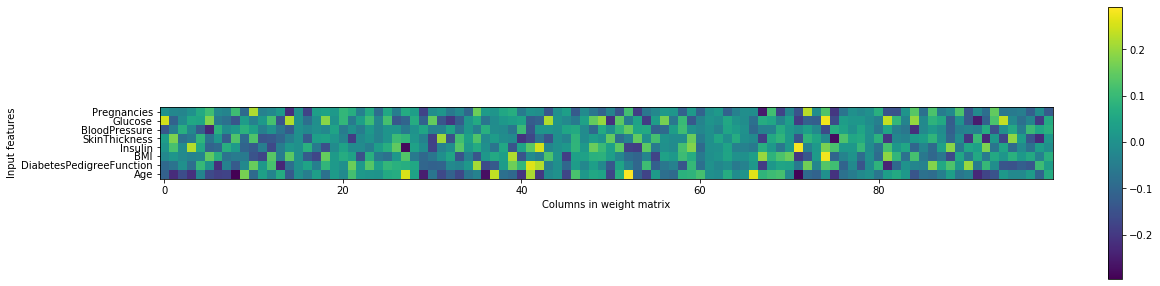

In [37]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(8),heading)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input features')
plt.colorbar()